<a href="https://colab.research.google.com/github/Ravikiranparanji/Adv-math-statistics/blob/main/Linear_regression_Ravi_MTH522_%20Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

data = pd.read_excel("crab_molt_data_sagi_gopala (1).xls")
print(data)


     Post-molt  Pre-molt
0        148.1     135.8
1        130.6     115.9
2        140.5     128.8
3        152.3     139.7
4        148.0     135.6
..         ...       ...
489      152.6     138.2
490      154.3     142.0
491      143.8     128.2
492      129.5     111.8
493      153.6     139.0

[494 rows x 2 columns]


In [ ]:
data.describe()


,Post-molt,Pre-molt
count,494.000000,494.000000
mean,143.644130,128.930162
std,13.987742,15.413379
min,38.800000,31.100000
25%,137.900000,120.925000
50%,147.500000,132.650000
75%,152.900000,139.600000
max,166.800000,154.500000


Splitting the given dataset into two seperate independent variables

In [ ]:
half_point = data.shape[1] // 2
data1 = data.iloc[:, :half_point]
data2 = data.iloc[:, half_point:]
print(data1, data2)


     Post-molt
0        148.1
1        130.6
2        140.5
3        152.3
4        148.0
..         ...
489      152.6
490      154.3
491      143.8
492      129.5
493      153.6

[494 rows x 1 columns]      Pre-molt
0       135.8
1       115.9
2       128.8
3       139.7
4       135.6
..        ...
489     138.2
490     142.0
491     128.2
492     111.8
493     139.0

[494 rows x 1 columns]


Finding the skewness

In [ ]:
data_skewness = data
skewness = skew(data_skewness)
print("skewness:", skewness)

skewness: [-2.19041457 -1.9151258 ]


Finding the kurtosis

In [ ]:
data_kurt = kurtosis(data)
print("kurtosis: ", data_kurt)

kurtosis:  [8.97782044 6.09408505]


Probability density function histogram for post_molt_data

[]

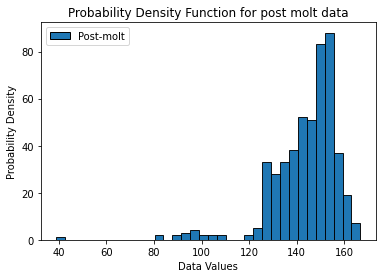

In [ ]:
sns.histplot(data1, label='Post Molt data', alpha=1)
plt.title('Probability Density Function for post molt data')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')

plt.plot()

probability density function histogram for pre_molt_data

[]

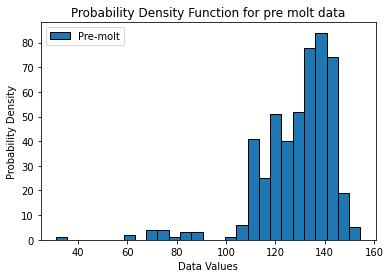

In [ ]:
sns.histplot(data2, label="Pre Molt data", alpha =1)
plt.title("Probability Density Function for pre molt data")
plt.xlabel("Data Values")
plt.ylabel("Probability Density")
plt.plot()

Smooth histograms for each variable

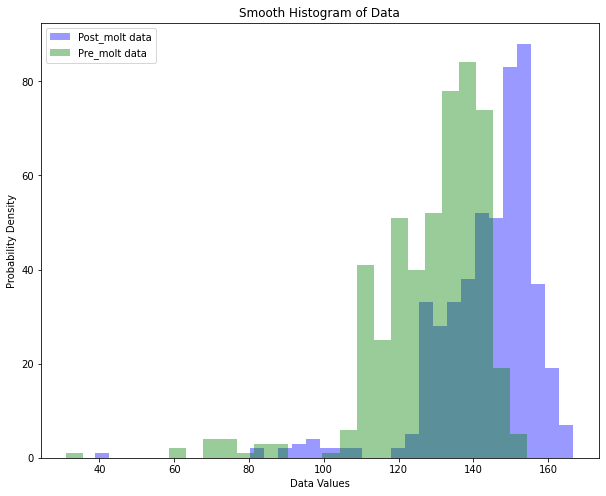

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(data1, hist=True, kde=False, kde_kws={'linewidth': 2}, label='Post_molt data', color='blue', ax=ax)
sns.distplot(data2, hist=True, kde=False, kde_kws={'linewidth': 2}, label='Pre_molt data', color='green', ax=ax)

plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('Smooth Histogram of Data')

ax.legend()

plt.show()


Plotting the “Pre-molt” size (dependent variable) as a function of “Post-molt” size (independent variable)

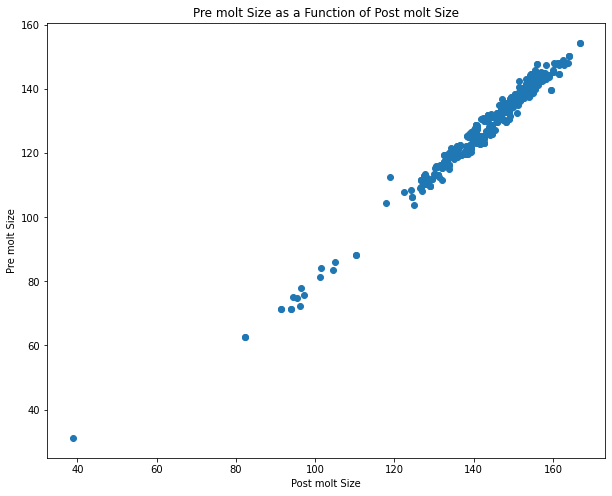

In [ ]:
post_molt_size = data1
pre_molt_size = data2

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(post_molt_size, pre_molt_size)

ax.set_title('Pre molt Size as a Function of Post molt Size')
ax.set_xlabel('Post molt Size')
ax.set_ylabel('Pre molt Size')

plt.show()

Carrying out a simple linear regression with “Post-molt” size as the predictor variable, and “Pre-molt” size as the predicted variable and Plotting the least squares linear regression line on the same plot as the data, and calculate Pearson’s r^2 for the regression.

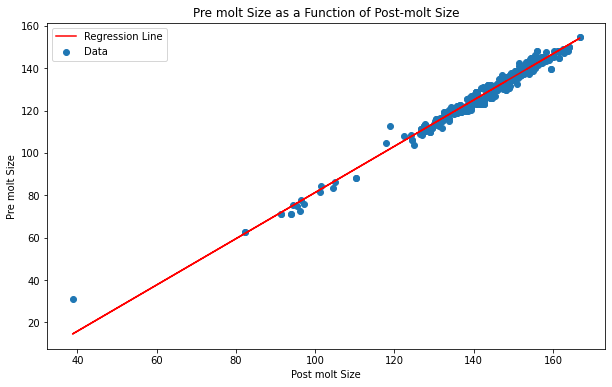

Pearson's r^2 for the regression: 0.9803334287618846


In [ ]:
post_molt_size = data1
pre_molt_size = data2

post_molt_size = np.array(post_molt_size)
pre_molt_size = np.array(pre_molt_size)

post_molt_size = sm.add_constant(post_molt_size)
model = sm.OLS(pre_molt_size, post_molt_size).fit()

prediction = model.predict(post_molt_size)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(post_molt_size[:,1], pre_molt_size, label='Data')
ax.plot(post_molt_size[:,1], prediction, 'r', label='Regression Line')
ax.set_title('Pre molt Size as a Function of Post-molt Size')
ax.set_xlabel('Post molt Size')
ax.set_ylabel('Pre molt Size')
ax.legend(loc='best')

plt.show()

r_squared = model.rsquared
print("Pearson's r^2 for the regression:", r_squared)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:41:46   Log-Likelihood:                -1081.2
No. Observations:                 494   AIC:                             2166.
Df Residuals:                     492   BIC:                             2175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.7901      1.005    -27.639      0.000     -29.766     -25.815
x1             1.0910      0.007    156.605      0.000       1.077       1.105
==============================================================================
Omnibus:                      133.585   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.279
Skew:                           0.902   Prob(JB):                    1.87e-257
Kurtosis:                      10.361   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Descriptive statistics of the residuals and quantile plot to test the normality

Descriptive statistics of the residuals:


Mean: -1.2120219358061708e-13
Standard deviation: 2.159345658617834
Minimum value: -6.42941112182146
Maximum value: 16.558053343950203
25th percentile: -1.3307990081910255
50th percentile (median): 0.15392717642920672
75th percentile: 1.3987040796186605


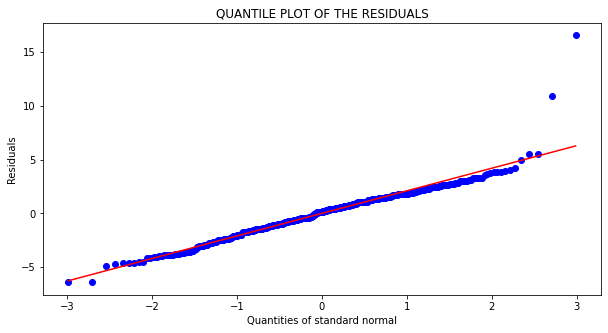

In [ ]:
post_molt_size = data1
pre_molt_size = data2

post_molt_size = np.array(post_molt_size)
pre_molt_size = np.array(pre_molt_size)

post_molt_size = sm.add_constant(post_molt_size)
model = sm.OLS(pre_molt_size, post_molt_size).fit()

residuals = model.resid

print("Descriptive statistics of the residuals:")
print("\n")
print("Mean:", np.mean(residuals))
print("Standard deviation:", np.std(residuals))
print("Minimum value:", np.min(residuals))
print("Maximum value:", np.max(residuals))
print("25th percentile:", np.percentile(residuals, 25))
print("50th percentile (median):", np.percentile(residuals, 50))
print("75th percentile:", np.percentile(residuals, 75))

fig, ax = plt.subplots(figsize=(10, 5))

stats.probplot(residuals, plot=ax, fit=True)
ax.set_title("QUANTILE PLOT OF THE RESIDUALS")
ax.set_xlabel("Quantities of standard normal")
ax.set_ylabel("Residuals")

plt.show()

Testing the distribution of residuals for normality by using a quantile plot and shapiro wilks test

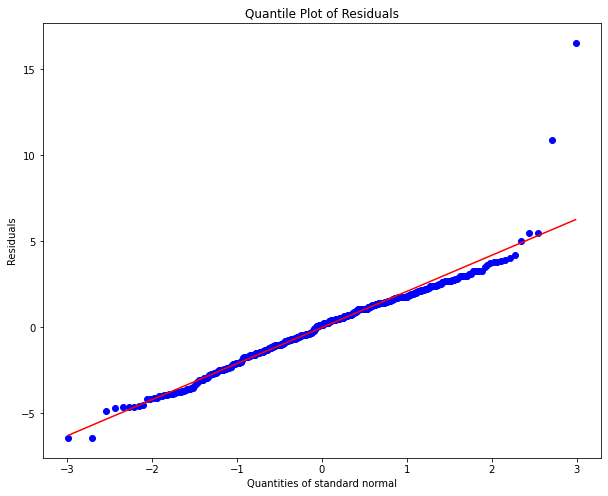

The residuals are not normally distributed, p-value = 2.6231412333065085e-13


In [ ]:
post_molt_size = data1
pre_molt_size = data2

post_molt_size = np.array(post_molt_size)
pre_molt_size = np.array(pre_molt_size)

post_molt_size = sm.add_constant(post_molt_size)
model = sm.OLS(pre_molt_size, post_molt_size).fit()

residuals = model.resid

fig, ax = plt.subplots(figsize=(10, 8))

stats.probplot(residuals, plot=ax, fit=True)
ax.set_title("Quantile Plot of Residuals")
ax.set_xlabel("Quantities of standard normal")
ax.set_ylabel("Residuals")

plt.show()

_, p_value = stats.shapiro(residuals)

if p_value < 0.05:
    print("The residuals are not normally distributed, p-value =", p_value)
else:
    print("The residuals are normally distributed, p-value =", p_value)

Plotting the residuals against the dependent variable to check for heteroscedasticity.

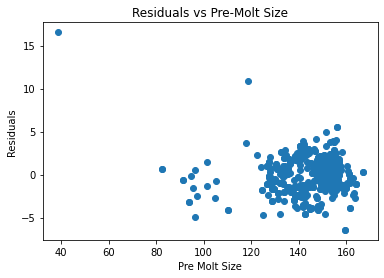

In [ ]:
pre_molt_size = data1

residuals = model.resid

plt.scatter(pre_molt_size, residuals)

plt.xlabel('Pre Molt Size')
plt.ylabel('Residuals')
plt.title('Residuals vs Pre-Molt Size')

plt.show()

It looks that there might not be any heteroscedasticity in the residuals based on the scatter plot of the residuals versus the pre-molt size variable that we have plotted. This demonstrates a crucial assumption of linear regression—that the variance of the residuals is essentially constant over the pre-molt size variable's range.

Also, if the residuals are all gathered in one area, there could not be much variety in the residuals' distribution, making it impossible to visually verify for heteroscedasticity in the first place.